<h1><center>CSE391 Data Science</center></h1>

<h1><center>Lecture </center></h1>
<h1><center>Nov 26 ,2018 </center></h1>




# Tensorflow

## Built to do efficient numerical computation in Python similar to Numpy

## But unlike Numpy that suffers from a lot of overhead from switching back to Python every operation, TensorFlow lets us describe a graph of interacting operations that run entirely outside Python

## The role of the Python code is therefore to build this external computation graph, and to dictate which parts of the computation graph should be run.




# Computational Graphs

A computational graph is a series of TensorFlow operations arranged into a graph of nodes.


- Building the computational graph.
- Running the computational graph.


## Example: make a computational graph for the followoing operation:

$e = (a+b)*(b+1)$


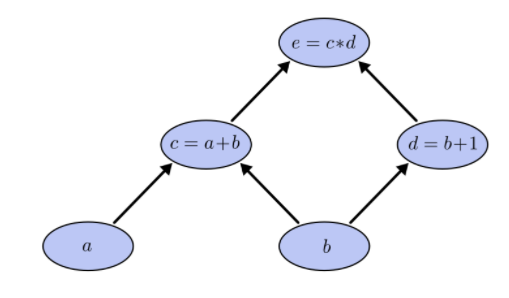

In [46]:
# import tensorflow
import tensorflow as tf
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2) # does not print out 3, and 4

Tensor("Const_4:0", shape=(), dtype=float32) Tensor("Const_5:0", shape=(), dtype=float32)


- We need to run the computational graph in a session as follows:

In [48]:

sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


- we can add our two constant nodes and produce a new graph as follows



In [49]:
node3 = tf.add(node1, node2)
print("node3: ", node3)
print("sess.run(node3): ",sess.run(node3))

node3:  Tensor("Add_3:0", shape=(), dtype=float32)
sess.run(node3):  7.0


 # A placeholder is a promise to provide a value later.
 
 
 ## a bit like a function or a lambda

In [50]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

- We can evaluate this graph by multiplying inputs by using the feed_dict parameter to specify Tensors 

In [51]:
print(sess.run(adder_node, {a: 3, b:4.5}))
print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

7.5
[ 3.  7.]


## Example: let's build a simple regression model and learn the parameters using Tensorflow

1- We need to create some variables.
 Variables allow us to add trainable parameters to a graph. They are constructed with a type and initial value:

In [ ]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)

- Build the linear model

In [52]:
linear_model = W * x + b

- To initialize all the variables in a TensorFlow program, you must explicitly call a special operation as follows:

In [53]:
init = tf.global_variables_initializer()
sess.run(init)

- compute the output:

In [54]:
print(sess.run(linear_model, {x:[1,2,3,4]}))

[ 0.          0.30000001  0.60000002  0.90000004]


- let's compute the model error for a given input

In [55]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

23.66


### Solving the simple regression model using the gradient descent algorithm in Tensorflow

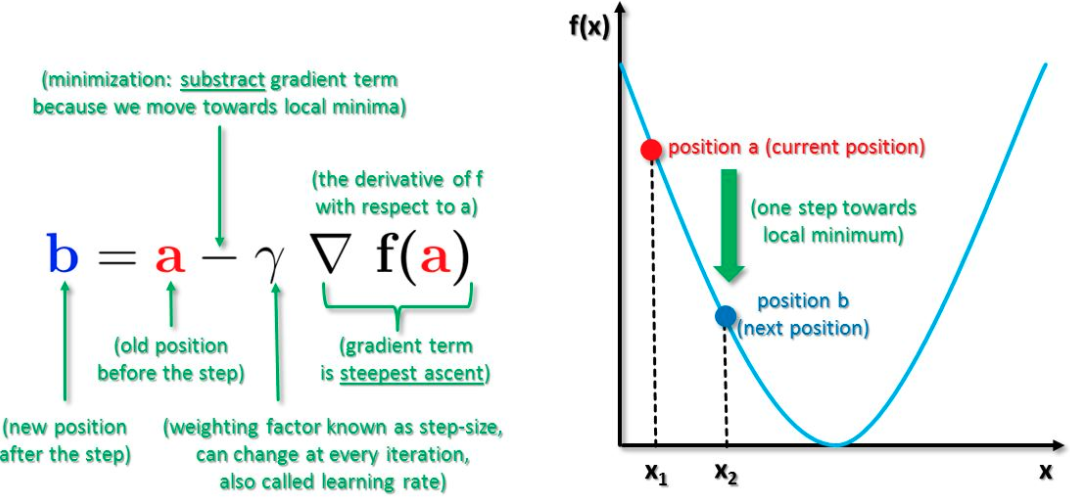

[SRC](http://www.big-data.tips/gradient-descent)





## problem of getting stuck in local minima

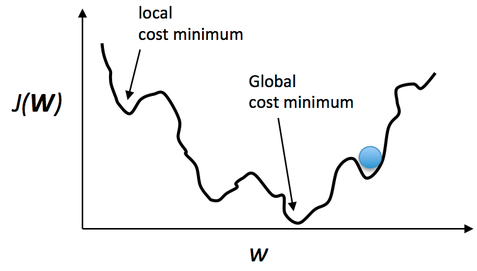


In [59]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
  sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})

print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


## Computational graph of the above example
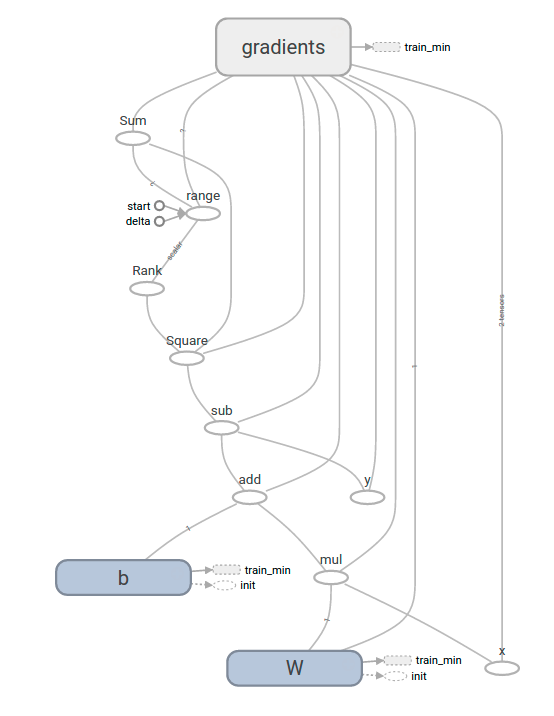

# Classification  Using Neural Networks

## Most widely used neural networks:
### Feedforward Neural Network 
### Radial basis function Neural Network
### Kohonen Self Organizing Neural Network
### Recurrent Neural Network(RNN) – Long Short Term Memory
### Convolutional Neural Network
###  Modular Neural Network

# Feedforward Neural Network


# Components of a neural network:

## Neuron: a basic unit of neural networks

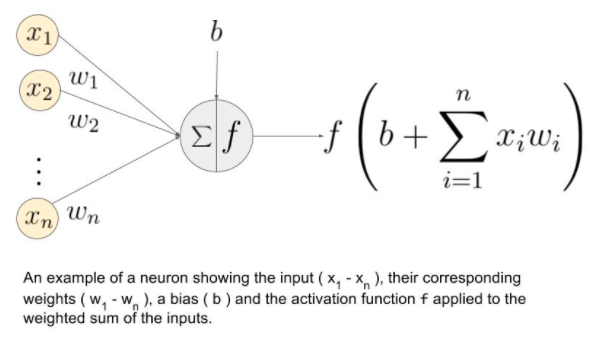


## Activation Functions:

### Sigmoid
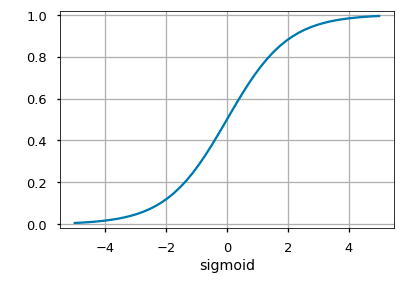
### Tanh

### Rectified Linear Unit (ReLU)

## Popular activation functions


## Input Layer
- the first layer of a neural network. It is used to provide the input data or features to the network.

## Output Layer
-  The activation function to be used in this layer is different for different problems. For a binary classification problem, we want the output to be either 0 or 1. Thus, a sigmoid activation function is used. For a Multiclass classification problem, a Softmax ( think of it as a generalization of sigmoid to multiple classes ) is used. For a regression problem, where the output is not a predefined category, we can simply use a linear unit.

### soft mask function at the output layer for the multi-class case:

## Hidden layer
-The hidden layers' job is to transform the inputs into something that the output layer can use.


## A simple example to understand the operations in a neural networks
- Given inputs and weights, compute the outputs
- Assume a sigmoid activation function
 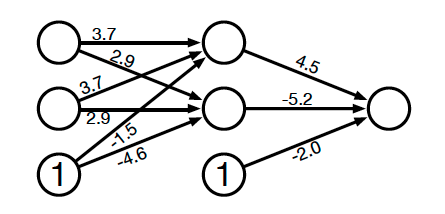
 
 - let $x_1 = 1.0$ and $x_2 = 0.0$, compute the output of the neural network
 
 - First we need to compute the hidden units outputs
 
 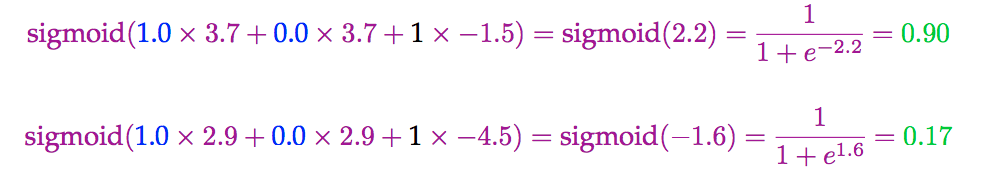
 
 - Here is updated neural network after computing the hidden layer outputs
 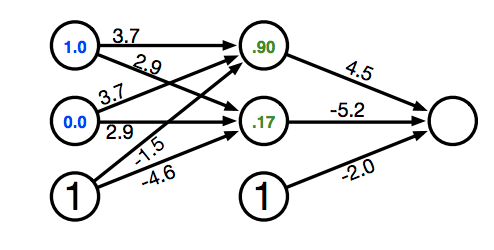
 - Now we are ready to compute the output
 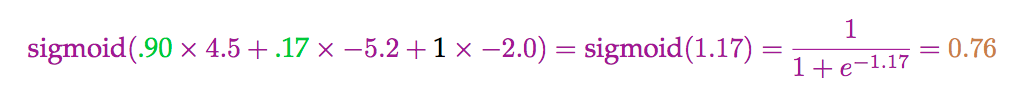
 
 - We can compute the outputs for all binary inputs; in fact this NN models a XOR operation:
 
 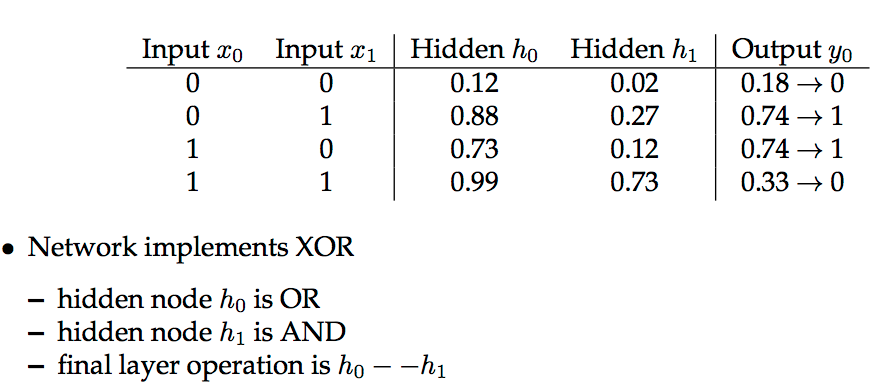
 
 
 # Another Example

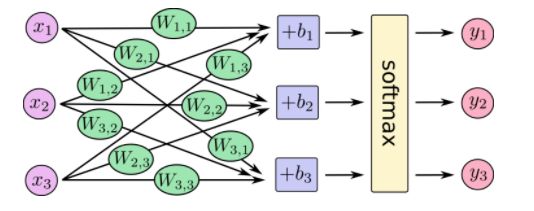

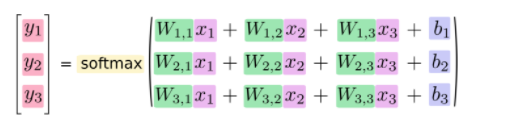

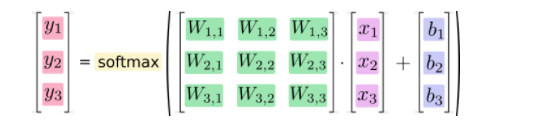

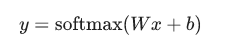
 



# How to train a neural network: 

 - The first question we need to ask is what are unknowns? 
     - answer: weights
 - The second question we need to ask is what is error in the network
     - answer; the error is difference between the output of the neural network and the actual output
 - How to minimize the error by selecting the proper weights?
 
 - In other words,  $E = \frac{1}{2}(t-y)^2$  where $t$ is the actual output and $y$ is the predicted output.
 
 
 # Steps to find the weights that minimize the error
- Gradient descent
    - error is a function of the weights
    - we want to reduce the error
    - gradient descent: move towards the error minimum
    - compute gradient!get direction to the error minimum
    - adjust weights towards direction of lower error
- Back-propagation
    - first adjust last set of weights
    - propagate error back to each previous layer
    - adjust their weights
    
 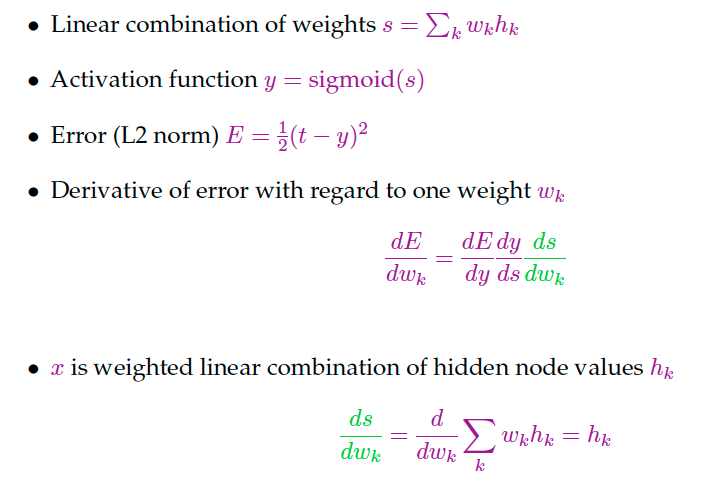  


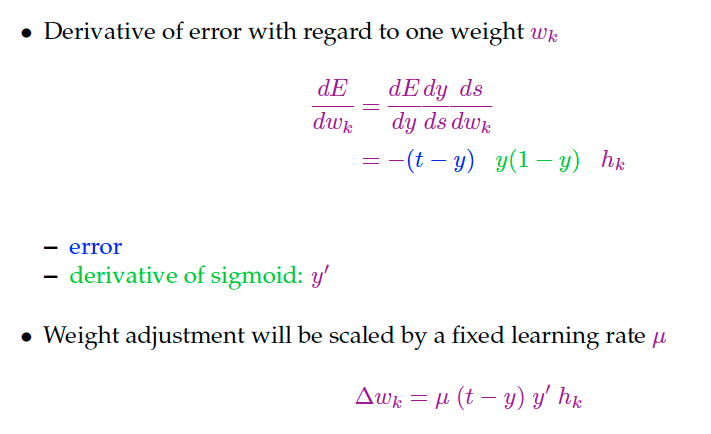
### Note that the derivative of sigmoid is calculated as follows:
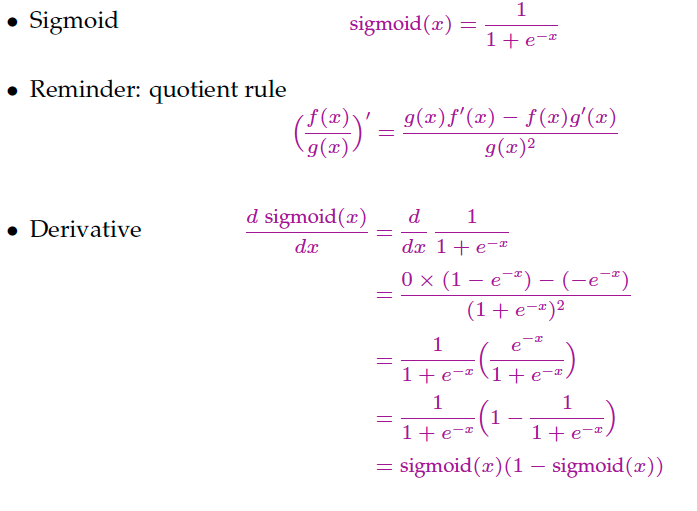

# Steps to learn a neural network

1. Model initialisation
2. Forward propagate
3. Loss function
4. Differentiation
5. Back-propagation
6. Weight update
7. Iterate until convergence

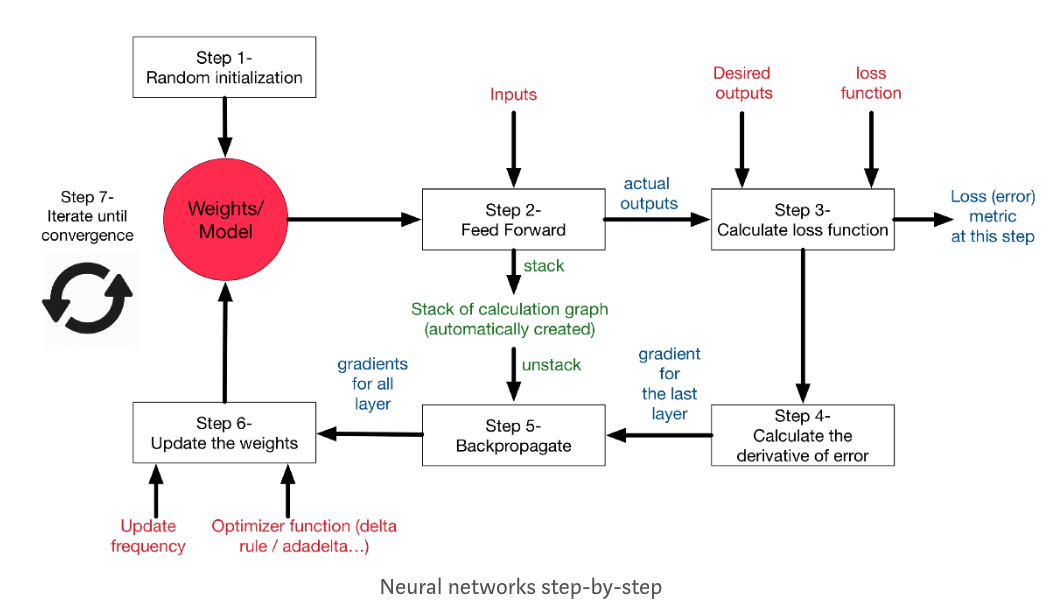
## Backpropagation
- Backpropagation is a method used in artificial neural networks to calculate a gradient that is needed in the calculation of the weights to be used in the network.




## [highly recommed this vidoe](https://www.youtube.com/watch?v=Ilg3gGewQ5U&vl=en)

## [ A simple way to understand Backpropagation](https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e)



# Challenges in neural networks
 - lots of data
 - overfitting
 - hyper parameter optimization
 - high performance hardware
 - not much theory
 - lack of multi-tasking


In [9]:
# Implementation of a simple MLP network with one hidden layer. Tested on the iris data set.
# Requires: numpy, sklearn>=0.18.1, tensorflow>=1.0

# NOTE: In order to make the code simple, we rewrite x * W_1 + b_1 = x' * W_1'
# where x' = [x | 1] and W_1' is the matrix W_1 appended with a new row with elements b_1's.
# Similarly, for h * W_2 + b_2

# author :vinhkhuc  Feb 26, 2017
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)


def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat

def get_iris_data():
    """ Read the iris data set and split them into training and test sets """
    iris   = datasets.load_iris()
    data   = iris["data"]
    target = iris["target"]
    print(target)
    # Prepend the column of 1s for bias
    N, M  = data.shape
    all_X = np.ones((N, M + 1))
    all_X[:, 1:] = data

    # Convert into one-hot vectors
    num_labels = len(np.unique(target))
    all_Y = np.eye(num_labels)[target]  # One liner trick!
    return train_test_split(all_X, all_Y, test_size=0.33, random_state=RANDOM_SEED)

def main():
    train_X, test_X, train_y, test_y = get_iris_data()

    # Layer's sizes
    x_size = train_X.shape[1]   # Number of input nodes: 4 features and 1 bias
    h_size = 256                # Number of hidden nodes
    y_size = train_y.shape[1]   # Number of outcomes (3 iris flowers)

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(100):
        # Train with each example
        for i in range(len(train_X)):
            sess.run(updates, feed_dict={X: train_X[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_X, y: train_y}))
        test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: test_X, y: test_y}))

        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    sess.close()

if __name__ == '__main__':
    main()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Epoch = 1, train accuracy = 65.00%, test accuracy = 70.00%
Epoch = 2, train accuracy = 65.00%, test accuracy = 70.00%
Epoch = 3, train accuracy = 68.00%, test accuracy = 70.00%
Epoch = 4, train accuracy = 70.00%, test accuracy = 70.00%
Epoch = 5, train accuracy = 71.00%, test accuracy = 74.00%
Epoch = 6, train accuracy = 72.00%, test accuracy = 76.00%
Epoch = 7, train accuracy = 77.00%, test accuracy = 78.00%
Epoch = 8, train accuracy = 80.00%, test accuracy = 78.00%
Epoch = 9, train accuracy = 83.00

# Understanding one-hot encoding
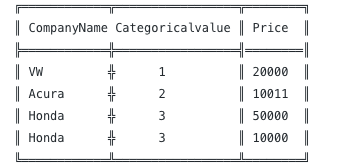
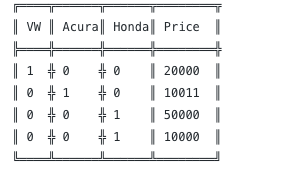

# Understanding Epoch
- example: Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch. Since you've specified 3 epochs, you have a total of 15 iterations (5*3 = 15) for training. 

# Deep neural networks


## deep learning is a fancy new term for multi layer neural networks, with the difference now being we have found efficient ways to train these deep (5+ hidden layers ) neural nets that wasn't possible before, mainly

### 1. computers are faster
### 2. more data are available

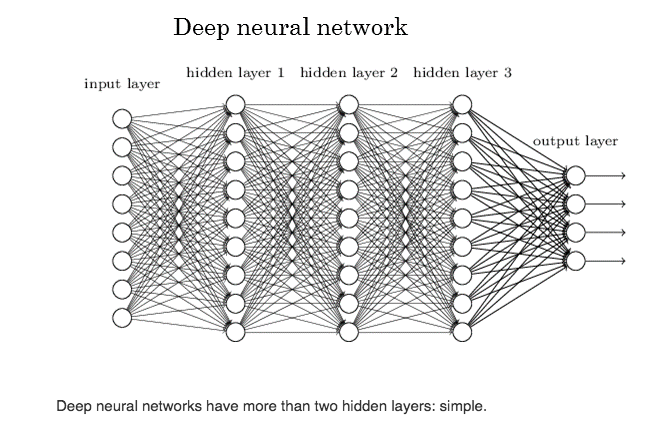

# What will be the future of Deep Learning ?
 Well let's see what leaders say:
 
 [Deep Learning and the Future of Artificial Intelligence](https://www.youtube.com/watch?v=RM-Jtc2ryfM)
 
 [Geoffrey Hinton: The Foundations of Deep Learning](https://www.youtube.com/watch?v=zl99IZvW7rE)

In [4]:
import random
import numpy as np
list = np.arange(1,27)
random.shuffle(list)
print(list)

[20 26 15  5  1  9 12  7 19 22 17  2  6 14 10 21 18  4  3 11 13  8 23 24 16
 25]
